# My Convolution Neural Network For MNIST Dataset 

##### To initialize all Libraries used in this model 

In [1]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.layers.convolutional import Conv2D
from keras.utils import np_utils
from keras import backend as K
from keras.callbacks import EarlyStopping
from keras.callbacks import TensorBoard
import pandas as pd
import numpy as np
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.utils import class_weight
from numpy.random import RandomState
import matplotlib.pyplot as plt
from keras.datasets import mnist
np.random.seed(1337)

Using TensorFlow backend.


#### To load the data into train and test set 

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
print("The Shape of the training data is :", X_train.shape)
print("The Shape of the testing data is :", X_test.shape)
print("The Shape of the training labels is :",y_train.shape)
print("The Shape of the testing labels is :",y_test.shape)

The Shape of the training data is : (60000, 28, 28)
The Shape of the testing data is : (10000, 28, 28)
The Shape of the training labels is : (60000,)
The Shape of the testing labels is : (10000,)


In [4]:
def reshape_data(arr, img_rows, img_cols, channels):
    
    return arr.reshape(arr.shape[0], img_rows, img_cols, channels)

In [5]:
batch_size = 200
nb_classes = 10
nb_epoch = 5

img_rows, img_cols = 28, 28
channels = 1
nb_filters = 10
kernel_size = (4,4)

### Reshaping data into Number_of_Images x Row_size x coloumn_size x channel_size
#### Note : channel_size will be one here as the image is grey scale image.

In [6]:
print("Reshaping Data")
X_train = reshape_data(X_train, img_rows, img_cols, channels)
X_test = reshape_data(X_test, img_rows, img_cols, channels)

Reshaping Data


In [7]:
print("X_train Shape: ", X_train.shape)
print("X_test Shape: ", X_test.shape)


X_train Shape:  (60000, 28, 28, 1)
X_test Shape:  (10000, 28, 28, 1)


In [8]:
input_shape = (img_rows, img_cols,channels)

### Image normalization

In [9]:
print("Normalizing Data")
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Normalizing Data


### Image Sample 

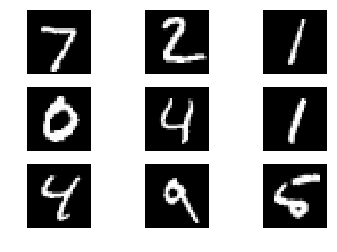

In [10]:
X_test1 = X_test.reshape(X_test.shape[0],1, img_rows, img_cols)
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test1[i,0], cmap='gray')
    plt.axis("off")

In [11]:
y1_test = y_test

## One Hot Encoding  

In [12]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print("y_train Shape: ", y_train.shape)
print("y_test Shape: ", y_test.shape)

y_train Shape:  (60000, 10)
y_test Shape:  (10000, 10)


## Model Structure

In [13]:
def cnn_model(X_train, X_test, y_train, y_test, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes):

    model = Sequential()
    model.add(Conv2D(nb_filters, (kernel_size[0], kernel_size[1]),border_mode='valid',input_shape=(img_rows, img_cols,channels)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    kernel_size = (6,6)    
    model.add(Conv2D(20, (kernel_size[0], kernel_size[1])))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())    
    model.add(Dense(128))
    model.add(Activation('relu'))
    model.add(Dense(nb_classes))
    model.add(Activation('softmax'))
    model.compile(loss = 'categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])
    print(model.summary())
    model.fit(X_train,y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test,y_test))

    return model


## Model Training

In [14]:
model = cnn_model(X_train, X_test, y_train, y_test, kernel_size, nb_filters, channels, nb_epoch, batch_size, nb_classes)
print("Predicting")
y_pred = model.predict(X_test)
score = model.evaluate(X_test, y_test, verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
y1_pred = model.predict_classes(X_test)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (4, 4), padding="valid", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 25, 25, 10)        170       
_________________________________________________________________
activation_1 (Activation)    (None, 25, 25, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 20)          7220      
_________________________________________________________________
activation_2 (Activation)    (None, 7, 7, 20)          0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 20)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 180)               0         
__________

## Confusion Matrix

Confusion matrix, without normalization
[[ 972    1    0    1    1    0    1    2    2    0]
 [   0 1130    1    2    0    1    1    0    0    0]
 [   2    0 1027    0    1    0    0    1    1    0]
 [   0    0    4  993    0    7    0    2    3    1]
 [   0    0    0    0  978    0    2    0    0    2]
 [   2    0    0    4    0  883    1    1    1    0]
 [   4    2    0    1    2    5  943    0    1    0]
 [   1    2   12    3    1    0    0 1004    0    5]
 [   4    0    2    0    2    2    0    2  958    4]
 [   3    2    1    3    6    6    0    6    0  982]]
Normalized confusion matrix
[[9.9183673469e-01 1.0204081633e-03 0.0000000000e+00 1.0204081633e-03
  1.0204081633e-03 0.0000000000e+00 1.0204081633e-03 2.0408163265e-03
  2.0408163265e-03 0.0000000000e+00]
 [0.0000000000e+00 9.9559471366e-01 8.8105726872e-04 1.7621145374e-03
  0.0000000000e+00 8.8105726872e-04 8.8105726872e-04 0.0000000000e+00
  0.0000000000e+00 0.0000000000e+00]
 [1.9379844961e-03 0.0000000000e+00 9.951550387

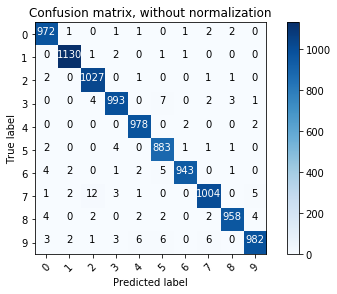

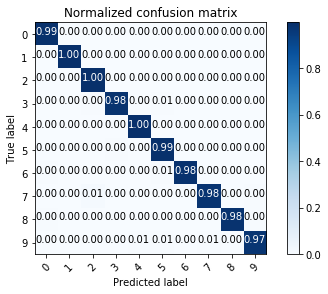

In [15]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
#method to print confusion metrix



cm = confusion_matrix(y1_test,y1_pred)
np.set_printoptions(precision=10)

cm_plot_labels = ['0','1','2','3','4','5','6','7','8','9']


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels, title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=cm_plot_labels , normalize=True, title='Normalized confusion matrix')
plt.show()

In [16]:
same=[]
different=[]
m=np.size(y1_test)
for i in range (0,m):
    if(y1_test[i]==y1_pred[i]):
        same.append(i)
    else:
        different.append(i)
        
error=different[0:6]
correct=same[0:6]
print(error)
print(y1_test[error[0]],y1_pred[error[0]])
print(correct)
print(y1_test[correct[0]],y1_pred[correct[0]])

[62, 247, 259, 340, 445, 449]
9 5
[0, 1, 2, 3, 4, 5]
7 7


## Wrongly classified Images 

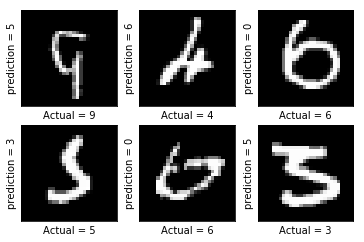

In [17]:
plt.figure(figsize=(6, 6))

for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test1[error[i],0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % y1_pred[error[i]], fontsize = 10)
    plt.xlabel("Actual = %d" % y1_test[error[i]], fontsize = 10)

## Correclty Classified Images

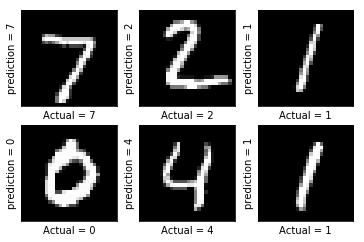

In [18]:
plt.figure(figsize=(6, 6))

for i in range(6):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test1[correct[i],0], cmap='gray')
    plt.gca().get_xaxis().set_ticks([])
    plt.gca().get_yaxis().set_ticks([])
    plt.ylabel("prediction = %d" % y1_pred[correct[i]], fontsize = 10)
    plt.xlabel("Actual = %d" % y1_test[correct[i]], fontsize = 10)